In [1]:
# Boiler plate imports 
import numpy as np
import cv2
from matplotlib import pyplot as plt
import easygui

In [26]:
# Loading in the imgages
colourOrange = plt.imread("data/orange.jpg")
colourWater = plt.imread("data/water.jpg")

orange = cv2.cvtColor(colourOrange,cv2.COLOR_BGR2GRAY)
water = cv2.cvtColor(colourWater,cv2.COLOR_BGR2GRAY)

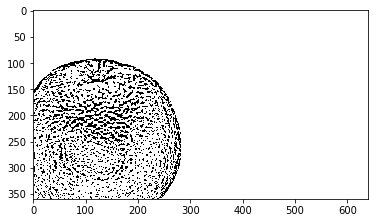

In [27]:
# Testing using adaptive tresholding
# Evaluation: 
# Doesn't provide complete capture of the iamge,
# this is due to the method selecting different tresh levels based on where the kernel is


orangeTresh = cv2.adaptiveThreshold(
            orange, 
            maxValue = 255, 
            adaptiveMethod = cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
            thresholdType = cv2.THRESH_BINARY, 
            blockSize = 21,
            C = 5)

plt.imshow(orangeTresh,cmap='gray')

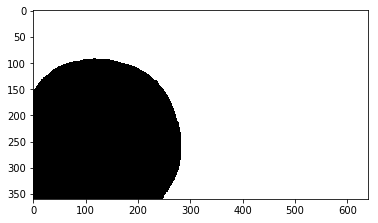

In [50]:
# Regular trhesholding with arduary values passed
# Evaluation:
# Clean extraction of the image
T, B = cv2.threshold(orange, thresh = 230, maxval = 255, type = cv2.THRESH_BINARY)
plt.imshow(B,cmap='gray')

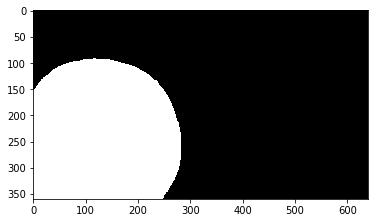

In [52]:
# Simply inversing the orange maks
BN = cv2.bitwise_not(B)
plt.imshow(BN,cmap='gray')

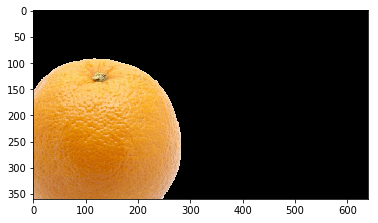

In [65]:
# Usig the previously inversed mask in order to cut out the orange from the original image
ROI = cv2.bitwise_and(colourOrange,colourOrange,mask=BN)
plt.imshow(ROI)

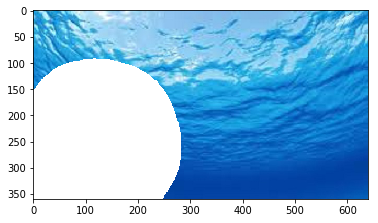

In [62]:
# Cutting out the inverse mask from the water image
waterCut = cv2.bitwise_or(colourWater,cv2.cvtColor(BN,cv2.COLOR_GRAY2BGR))
plt.imshow(waterCut)

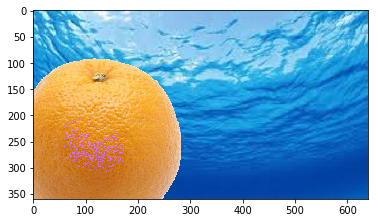

In [64]:
# Combining the final two images together simply though the plus orperator
# Evaulaiton:
# There's some pink spots appearing on the orange in the center.
finalImage = ROI + waterCut
plt.imshow(finalImage)